In [14]:
# MNIST dataset으로 CNN 모델 작성
# Functional API 모델 구현
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model, load_model
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, ReLU
from keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 구조 변경 (차원)
print(x_train.shape) # (60000, 28, 28)
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0 # 흑백이기 때문에 1을 준다
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
print(x_train.shape) # (60000, 28, 28, 1)

# 모델 정의
inputs = Input(shape=(28,28,1))

'''방법 1
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPool2D(2)(x)

x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPool2D(2)(x)

# Fully Connected Layers
x = Flatten()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)

outputs = Dense(10, activation='softmax')(x)
'''

# 방법 2 - BatchNormalization Conv/Dense 뒤에 배치 : 학습 안정화, 수렴 가속화
# use_bias=False : Conv/Dense의 bias 제거 (BatchNorm 역할)
x = Conv2D(16, (3, 3), padding='same', use_bias=False)(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(32, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same', use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(64, use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.3)(x)

x = Dense(32, use_bias=False)(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.2)(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

model.summary()

(60000, 28, 28)
(60000, 28, 28, 1)


Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 16)     │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 32)     │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 32)       │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           12

 Total params: 35,482 (138.60 KB)

 Trainable params: 35,130 (137.23 KB)

 Non-trainable params: 352 (1.38 KB)

In [16]:
# 학습 방법
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(patience=3, restore_best_weights=True)

# 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[es], verbose=2)


Epoch 1/100
422/422 - 17s - 41ms/step - accuracy: 0.7432 - loss: 0.8475 - val_accuracy: 0.2315 - val_loss: 2.5496
Epoch 2/100
422/422 - 12s - 29ms/step - accuracy: 0.9285 - loss: 0.2575 - val_accuracy: 0.9812 - val_loss: 0.0627
Epoch 3/100
422/422 - 12s - 30ms/step - accuracy: 0.9499 - loss: 0.1764 - val_accuracy: 0.9877 - val_loss: 0.0430
Epoch 4/100
422/422 - 12s - 29ms/step - accuracy: 0.9589 - loss: 0.1451 - val_accuracy: 0.9892 - val_loss: 0.0365
Epoch 5/100
422/422 - 13s - 30ms/step - accuracy: 0.9649 - loss: 0.1255 - val_accuracy: 0.9907 - val_loss: 0.0313
Epoch 6/100
422/422 - 14s - 32ms/step - accuracy: 0.9691 - loss: 0.1126 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 7/100
422/422 - 13s - 30ms/step - accuracy: 0.9714 - loss: 0.1008 - val_accuracy: 0.9915 - val_loss: 0.0289
Epoch 8/100
422/422 - 13s - 30ms/step - accuracy: 0.9735 - loss: 0.0948 - val_accuracy: 0.9922 - val_loss: 0.0294
Epoch 9/100
422/422 - 12s - 30ms/step - accuracy: 0.9750 - loss: 0.0892 - val_accuracy: 

In [19]:
# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'train_loss : {train_loss:.4f}, train_acc : {train_acc*100:.4f}%')
print(f'test_loss : {test_loss:.4f}, test_acc : {test_acc*100:.4f}%')

train_loss : 0.0199, train_acc : 99.4067%
test_loss : 0.0238, test_acc : 99.2800%


In [ ]:
# 모델 저장
save_path = "/Users/bunny/Documents/git_practice/python_analysis/tensorflow/model/mnist_cnn_FuncAIP.keras"
# model.save(save_path)

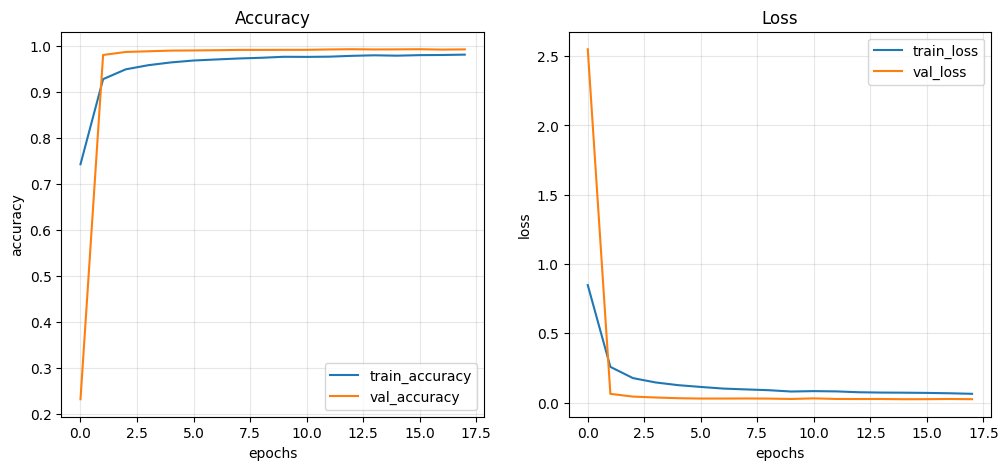

In [18]:
# 시각화 : 학습 곡선 ( 정확도 / 손실 )
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.show()